In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.shape

(6704, 6)

In [5]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
df['Age-mean']=df.Age.fillna(df.Age.mean())

In [8]:
df['Age-median']=df.Age.fillna(df.Age.median())

In [9]:
df['Age-mode']=df.Age.fillna(df.Age.mode())

In [10]:
df['Age-inter']=df.Age.interpolate(method='linear', limit_direction='forward',axis=0)

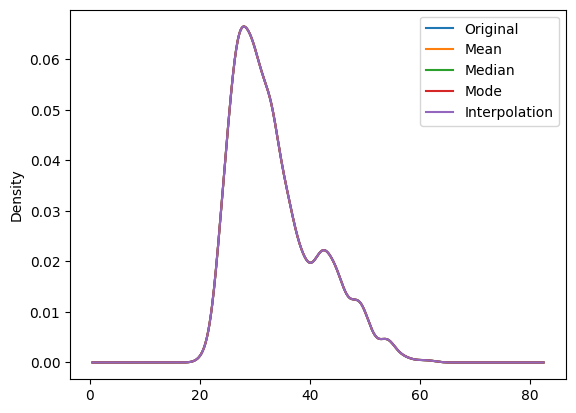

In [11]:
df['Age'].plot(kind='kde', label='Original')
df['Age-mean'].plot(kind='kde' ,label='Mean')
df['Age-median'].plot(kind='kde' ,label='Median')
df['Age-mode'].plot(kind='kde' ,label='Mode')
df['Age-inter'].plot(kind='kde' ,label='Interpolation')
plt.legend()
plt.show()

In [12]:
# As all three methods have same results so i can select anyone

In [13]:
df['Age']=df['Age-inter']

In [14]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age-mean,Age-median,Age-mode,Age-inter
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,32.0,32.0,32.0,32.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,28.0,28.0,28.0,28.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,45.0,45.0,45.0,45.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,36.0,36.0,36.0,36.0
4,52.0,Male,Master's,Director,20.0,200000.0,52.0,52.0,52.0,52.0


In [15]:
df=df.drop(['Age-mean','Age-median','Age-mode','Age-inter'],axis=1)

In [16]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [17]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [18]:
df.Gender

0         Male
1       Female
2         Male
3       Female
4         Male
         ...  
6699    Female
6700      Male
6701    Female
6702      Male
6703    Female
Name: Gender, Length: 6704, dtype: object

In [19]:
df.Gender.unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [20]:
df['Gender']=df.Gender.fillna(df.Gender.mode()[0])

In [21]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [22]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [23]:
df['Education Level'].replace(["Bachelor's Degree",'phD',"Master's Degree"],["Bachelor's",'PhD',"Master's"], inplace=True)

C:\Users\ahsan\AppData\Local\Temp\ipykernel_11920\1804724535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education Level'].replace(["Bachelor's Degree",'phD',"Master's Degree"],["Bachelor's",'PhD',"Master's"], inplace=True)


In [24]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, 'High School'], dtype=object)

In [25]:
df['Education Level']=df['Education Level'].fillna(df['Education Level'].mode()[0])

In [26]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [27]:
df['Job Title']=df['Job Title'].fillna(df['Job Title'].mode()[0])

In [28]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    3
Salary                 5
dtype: int64

In [29]:
df['Years of Experience_mean']=df['Years of Experience'].fillna(df['Years of Experience'].mean())

In [30]:
df['Years of Experience_median']=df['Years of Experience'].fillna(df['Years of Experience'].median())

In [31]:
df['Years of Experience_mode']=df['Years of Experience'].fillna(df['Years of Experience'].mode()[0])

In [32]:
df['Years of Experience_inter']=df['Years of Experience'].interpolate(method='linear',limit_direction='forward',axis=0)

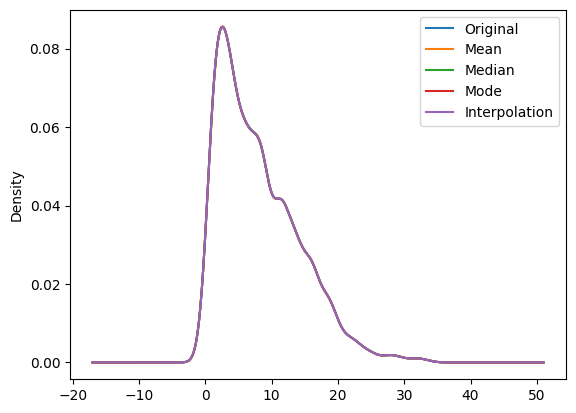

In [33]:
df['Years of Experience'].plot(kind='kde',label='Original')
df['Years of Experience_mean'].plot(kind='kde',label='Mean')
df['Years of Experience_median'].plot(kind='kde',label='Median')
df['Years of Experience_mode'].plot(kind='kde',label='Mode')
df['Years of Experience_inter'].plot(kind='kde',label='Interpolation')
plt.legend()
plt.show()

In [34]:
# All methods have same results so i am choosing mean

In [35]:
df['Years of Experience']=df['Years of Experience_mean']

In [36]:
df['Salary_mean']=df['Salary'].fillna(df['Salary'].mean())

In [37]:
df['Salary_median']=df['Salary'].fillna(df['Salary'].median())

In [38]:
df['Salary_mode']=df['Salary'].fillna(df['Salary'].mode())

In [39]:
df['Salary_inter']=df['Salary'].interpolate(method='linear',limit_direction='forward',axis=0)

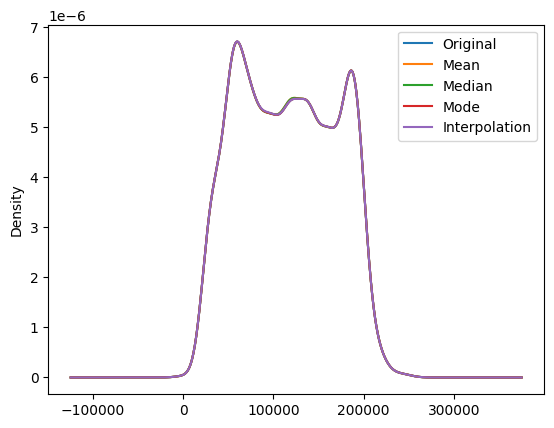

In [40]:
df['Salary'].plot(kind='kde',label='Original')
df['Salary_mean'].plot(kind='kde',label='Mean')
df['Salary_median'].plot(kind='kde',label='Median')
df['Salary_mode'].plot(kind='kde',label='Mode')
df['Salary_inter'].plot(kind='kde',label='Interpolation')
plt.legend()
plt.show()

In [41]:
# As the result of all methods is same so i am choosing mean

In [42]:
df['Salary']=df['Salary_mean']

In [43]:
df.isnull().sum()

Age                           0
Gender                        0
Education Level               0
Job Title                     0
Years of Experience           0
Salary                        0
Years of Experience_mean      0
Years of Experience_median    0
Years of Experience_mode      0
Years of Experience_inter     0
Salary_mean                   0
Salary_median                 0
Salary_mode                   5
Salary_inter                  0
dtype: int64

In [44]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Years of Experience_mean,Years of Experience_median,Years of Experience_mode,Years of Experience_inter,Salary_mean,Salary_median,Salary_mode,Salary_inter
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,5.0,5.0,5.0,5.0,90000.0,90000.0,90000.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,3.0,3.0,3.0,3.0,65000.0,65000.0,65000.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,15.0,15.0,15.0,15.0,150000.0,150000.0,150000.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,7.0,7.0,7.0,7.0,60000.0,60000.0,60000.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0,20.0,20.0,20.0,20.0,200000.0,200000.0,200000.0,200000.0


In [45]:
df=df.drop(['Years of Experience_mean','Years of Experience_median','Years of Experience_mode','Years of Experience_inter','Salary_mean','Salary_median','Salary_mode','Salary_inter'],axis=1)

In [46]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [47]:
le=LabelEncoder()

In [48]:
df['Job Title']=le.fit_transform(df['Job Title'])

In [49]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,177,5.0,90000.0
1,28.0,Female,Master's,18,3.0,65000.0
2,45.0,Male,PhD,145,15.0,150000.0
3,36.0,Female,Bachelor's,116,7.0,60000.0
4,52.0,Male,Master's,26,20.0,200000.0


In [50]:
gender_d=pd.get_dummies(df['Gender'], drop_first=True)

In [51]:
Edu_d=pd.get_dummies(df['Education Level'],drop_first=True)

In [52]:
df2=pd.concat([df,gender_d,Edu_d],axis=1)

In [53]:
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Male,Other,High School,Master's,PhD
0,32.0,Male,Bachelor's,177,5.0,90000.0,True,False,False,False,False
1,28.0,Female,Master's,18,3.0,65000.0,False,False,False,True,False
2,45.0,Male,PhD,145,15.0,150000.0,True,False,False,False,True
3,36.0,Female,Bachelor's,116,7.0,60000.0,False,False,False,False,False
4,52.0,Male,Master's,26,20.0,200000.0,True,False,False,True,False


In [54]:
df2=df2.drop(['Gender','Education Level'],axis=1)

In [55]:
df2.head()

,Age,Job Title,Years of Experience,Salary,Male,Other,High School,Master's,PhD
0,32.0,177,5.0,90000.0,True,False,False,False,False
1,28.0,18,3.0,65000.0,False,False,False,True,False
2,45.0,145,15.0,150000.0,True,False,False,False,True
3,36.0,116,7.0,60000.0,False,False,False,False,False
4,52.0,26,20.0,200000.0,True,False,False,True,False


In [56]:
x=df2.drop(['Salary'], axis=1)

In [57]:
y=df2.Salary

In [83]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [84]:
model= LinearRegression()

In [85]:
model.fit(x_train,y_train)

LinearRegression()

In [86]:
model.score(x_test,y_test)

0.7190275163463895

In [87]:
y_predict=model.predict(x)

In [88]:
mae= mean_absolute_error(y,y_predict)

In [89]:
mse = mean_squared_error(y,y_predict)

In [90]:
r2 = r2_score(y,y_predict)

In [91]:
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"r2_Score : {r2}")

mae : 21964.097153354338
mse : 785623783.3975686
r2_Score : 0.7177961386564276
